In [469]:
! source spaceenv/bin/activate

In [470]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [471]:
# Importing Libraries
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, GridSearchCV

# Importing libraries for checking the Gaussian Distribution
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# Classification Algorithms
from sklearn import svm
from xgboost import XGBClassifier as XGBC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC

# Evaluation Matrix
from sklearn.metrics import classification_report

In [472]:
# Defining Class for preparing Data to apply ML Models
class Pre_processing():
    # Defining Data Importing Function
    def data_loading(self, path):
        df = pd.read_csv(path)

        return df

    # Defining function to convert boolean data into numeric data
    def boolean_col_preprocessing(self, df):
        bool_list = df.select_dtypes(include='bool').columns
        for col in bool_list:
            if col != 'Type':
                df[col] = df[col].map({True:1, False:0})
        
        return df

    # One-Hot Encoding function to convert object data into numeric data
    def object_col_preprocessing(self, df):
        object_list = df.select_dtypes(include='object').columns

        for col in object_list:
            if col != 'Type':
                dummy_df = pd.get_dummies(df[col])
                df = pd.concat([df, dummy_df], axis='columns')
        
        df = df.drop(object_list[:-1], axis='columns')
        
        return df

    # Normalisation function for scaling of Data 
    def normlisation(self, df):
        # fit scaler on training data
        norm = MinMaxScaler().fit(df)

        # transform training data
        norm_data = norm.transform(df)
        norm_data = pd.DataFrame(norm_data, columns=df.columns)

        return norm_data      
    
    # Train and Test Splitting of Data
    def data_split(self, df):
        training_data = df.drop('Transported', axis='columns')
        validation_data = df['Transported']
        X_train, X_test, y_train, y_test = tts(training_data, validation_data, test_size=0.2, shuffle=True)

        return X_train, X_test, y_train, y_test

In [473]:
# Defining a class to Check and Scale the Data
class NormalDistribution():
    def __init__(self, df):
        self.dataframe = df

    # Defining Function for QQ Plot
    def qqplot(self, colname):
        stats.probplot(self.dataframe[colname], dist='norm', plot=plt)
        plt.show()

    # Defining a Function for Histogram Plot
    def histplot(self, colname):
        bins = np.linspace(-20, 20, 100)
        sns.histplot(self.dataframe[colname], kde=True)
        # plt.hist(self.dataframe[colname], bins, alpha=0.5, label=colname)
        plt.suptitle('Distribution of {}'.format(colname))
        plt.show()

    # Defining a Function to check the Gaussian Distribution with respect to P value using Shapiro-Wilk & D'Agostino's K^2 Test
    def gaussian_check(self, colname):
        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(self.dataframe[colname])

        # D'Agostino's K^2 Test
        agostino_stat, agostino_p = normaltest(self.dataframe[colname])

        if shapiro_p > 0.05:
            print("As per Shapiro-Wilk's Test for Column Name: " + colname + ' -----------> Sample looks Gaussian (Accept H0)\n')
        else:
            print("As per Shapiro-Wilk's Test for Column Name: " + colname + ' -----------> Sample does not look Gaussian (Reject H0)\n')

        if agostino_p > 0.05:
            print("As per D'Agostino's K^2 Test for Column Name: " + colname + ' -----------> Sample looks Gaussian (Accept H0)\n')
        else:
            print("As per D'Agostino's K^2 Test for Column Name: " + colname + ' -----------> Sample does not look Gaussian (Reject H0)\n')

In [474]:
Pp = Pre_processing()
data = Pp.data_loading('/home/meghal/Personal/Personal Projects/Space Titanic/Data/cleaned_training_data.csv')
data['Cabin'] = data.Cabin.apply(lambda x: x.split('/')[2])
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Type
0,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Train
1,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Train
2,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Train
3,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Train
4,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Earth,False,S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,True,Test
12855,Earth,True,S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,True,Test
12856,Earth,False,P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,True,Test
12857,Mars,True,P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,True,Test


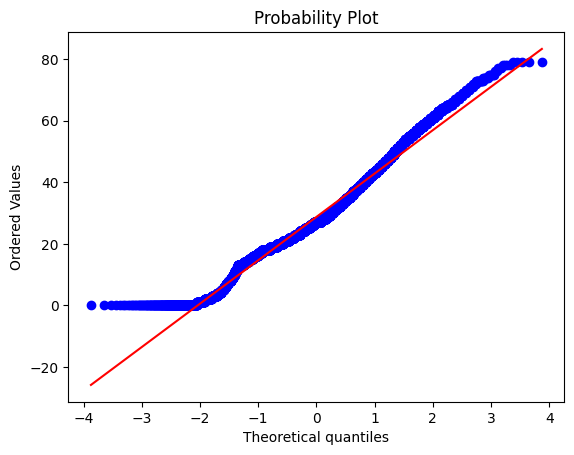

In [475]:
ND = NormalDistribution(data)

ND.qqplot('Age')

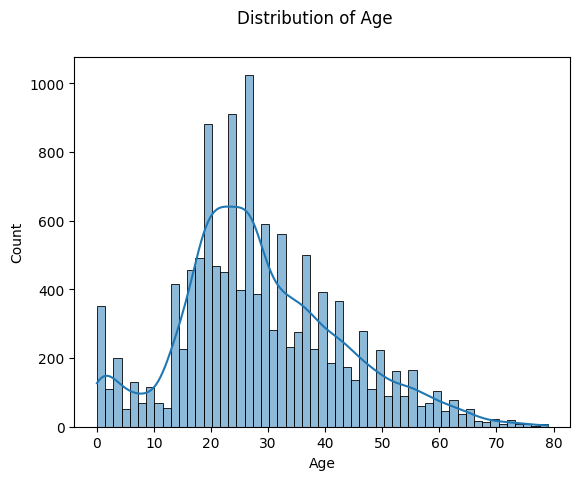

As per Shapiro-Wilk's Test for Column Name: Age -----------> Sample does not look Gaussian (Reject H0)

As per D'Agostino's K^2 Test for Column Name: Age -----------> Sample does not look Gaussian (Reject H0)



/home/meghal/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [476]:
ND.histplot('Age')
ND.gaussian_check('Age')

<AxesSubplot:>

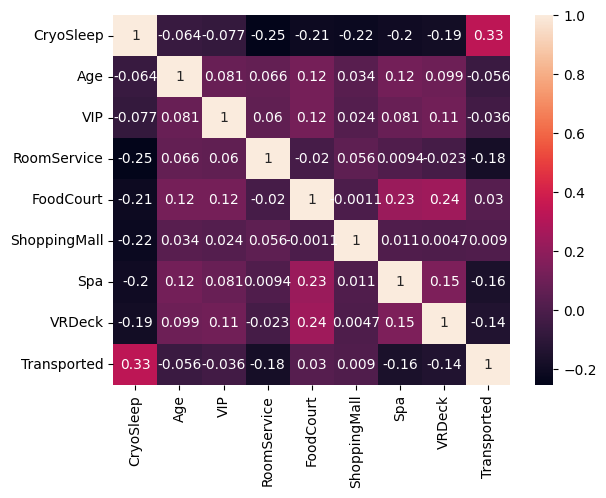

In [477]:
sns.heatmap(data.corr(), annot=True) # Checking the Correlation between the variables

In [478]:
data.dtypes

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Type             object
dtype: object

In [479]:
# Converting Boolean variables by calling the Data Preparation class and it's function
data = Pp.boolean_col_preprocessing(data)
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Type
0,Europa,0,P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,Train
1,Earth,0,S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,Train
2,Europa,0,S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,Train
3,Europa,0,S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,Train
4,Earth,0,S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Earth,0,S,TRAPPIST-1e,40.0,0,0.0,865.0,0.0,3.0,0.0,1,Test
12855,Earth,1,S,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0,1,Test
12856,Earth,0,P,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0,1,Test
12857,Mars,1,P,55 Cancri e,27.0,0,0.0,0.0,0.0,0.0,0.0,1,Test


In [480]:
# Converting Categorical variables by calling the Data Preparation class and it's function
data = Pp.object_col_preprocessing(data)
data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Type,Earth,Europa,Mars,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,Train,0,1,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,Train,1,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,Train,0,1,0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,Train,0,1,0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,Train,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,0,40.0,0,0.0,865.0,0.0,3.0,0.0,1,Test,1,0,0,0,1,0,0,1
12855,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,Test,1,0,0,0,1,0,0,1
12856,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,Test,1,0,0,1,0,0,0,1
12857,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,Test,0,0,1,1,0,1,0,0


In [481]:
# Seggregating Training dataset from the main Dataset to perform ML Operations
train_data = data[data['Type']=='Train'].drop('Type', axis='columns')
train_data.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
count,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000
mean,0.349499,28.793227,0.022924,224.739249,457.860546,173.891741,311.344935,304.775443,0.503513,0.552356,0.245248,0.202396,0.506624,0.493376,0.207349,0.091464,0.701186
std,0.476839,14.342694,0.149669,660.109814,1595.030016,597.801683,1125.417937,1133.801332,0.500016,0.497280,0.430259,0.401809,0.499985,0.499985,0.405431,0.288285,0.457764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,78.000000,117.000000,45.000000,89.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [482]:
# Scaling the variables to avoid false predictions
train_data = Pp.normlisation(train_data)
train_data.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
count,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000
mean,0.349499,0.364471,0.022924,0.015686,0.015358,0.007402,0.013894,0.012629,0.503513,0.552356,0.245248,0.202396,0.506624,0.493376,0.207349,0.091464,0.701186
std,0.476839,0.181553,0.149669,0.046075,0.053501,0.025447,0.050224,0.046981,0.500016,0.497280,0.430259,0.401809,0.499985,0.499985,0.405431,0.288285,0.457764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.468354,0.000000,0.005444,0.003924,0.001916,0.003972,0.002901,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [483]:
# Training and Testing Data Splitting
X_train, X_test, y_train, y_test = Pp.data_split(train_data)

## Hyperparameter Tunning

In [484]:
# Defining various Models and their parameters to check best model for the given Dataset.
model_selection = {
    'Logistic Regression' : {
        'model' : LR(),
        'parameters' : {
            'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : [1.0, 10.0, 20.0, 30.0],
            'fit_intercept' : [True, False],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter' : [itr for itr in range(100, 600, 100)]
        }
    },
    'Support Vector machine' : {
        'model' : svm.SVC(),
        'parameters': {
            'C' : [1.0, 10.0, 20.0, 30.0],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'degree' : list(range(1, 10)),
            'gamma' : ['scale', 'auto'],
            'shrinking' : [True, False],
            'max_iter' : [itr for itr in range(100, 600, 100)]
        }
    },
    'KNeighbors' : {
        'model' : KNN(),
        'parameters' : {
            'leaf_size' : list(range(1,30)),
            'n_neighbors' : list(range(1,20)),
            'metric' : ['minkowski','euclidean','manhattan']
        }
    },
    'Decision Tree' : {
        'model' : DTC(),
        'parameters' : {
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random'],
            'max_depth' : list(range(5, 55, 5)),
            'min_samples_split' : list(range(1, 10)),
            'min_samples_leaf' : list(range(1, 22, 2)),
            'max_features' : ['auto', 'sqrt', 'log2']
        }
    },
    'Random Forest Tree' : {
        'model' : RFC(),
        'parameters' : {
            'n_estimators' : list(range(100, 600, 100)),
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'max_depth' : list(range(5, 55, 5)),
            'min_samples_split' : list(range(1, 20)),
            'min_samples_leaf' : list(range(1, 22, 2)),
            'max_features' : ['auto', 'sqrt', 'log2'],
            'bootstrap' : [True, False],
            'oob_score' : [True, False],
            'warm_start' : [True, False]    
        }
    },
    'XG Booster' : {
        'model' : XGBC(),
        'parameters' : {
            "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
        }
    }
}

In [485]:
for model_name, model in model_selection.items():
    clf = GridSearchCV(model['model'], model['parameters'], cv=10, verbose=1, scoring='accuracy', n_jobs=-1, return_train_score=True)
    clf.fit(X_train, y_train)

print(clf.best_params_)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meghal/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_i

In [ ]:
preds = clf.best_estimator_.predict(X_test)
preds